# W7 Activity 2
## Ivan Zepeda
C0883949

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale, MinMaxScaler
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# ACTIVITY

In [6]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df = df[["SalePrice","LotArea"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
 1   LotArea    1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


# Hierarchical clustering

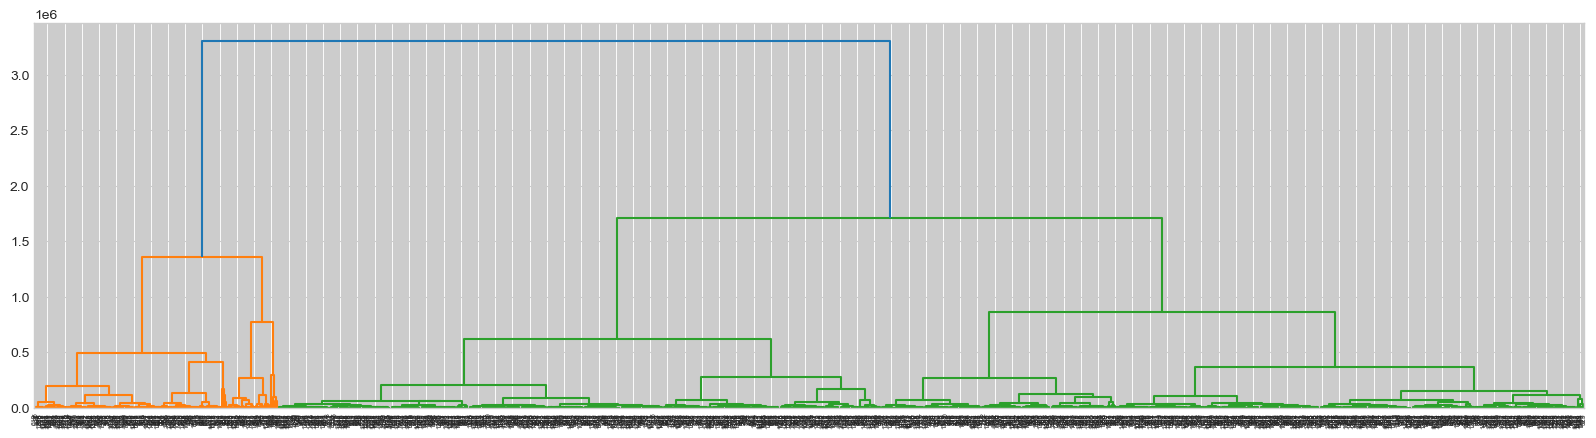

In [20]:
# Create a dendrogram
plt.figure(figsize=(20,5))
#dendogram needs to be named differently as it shares the name  with scipy
_dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [10]:
points = df.to_numpy()

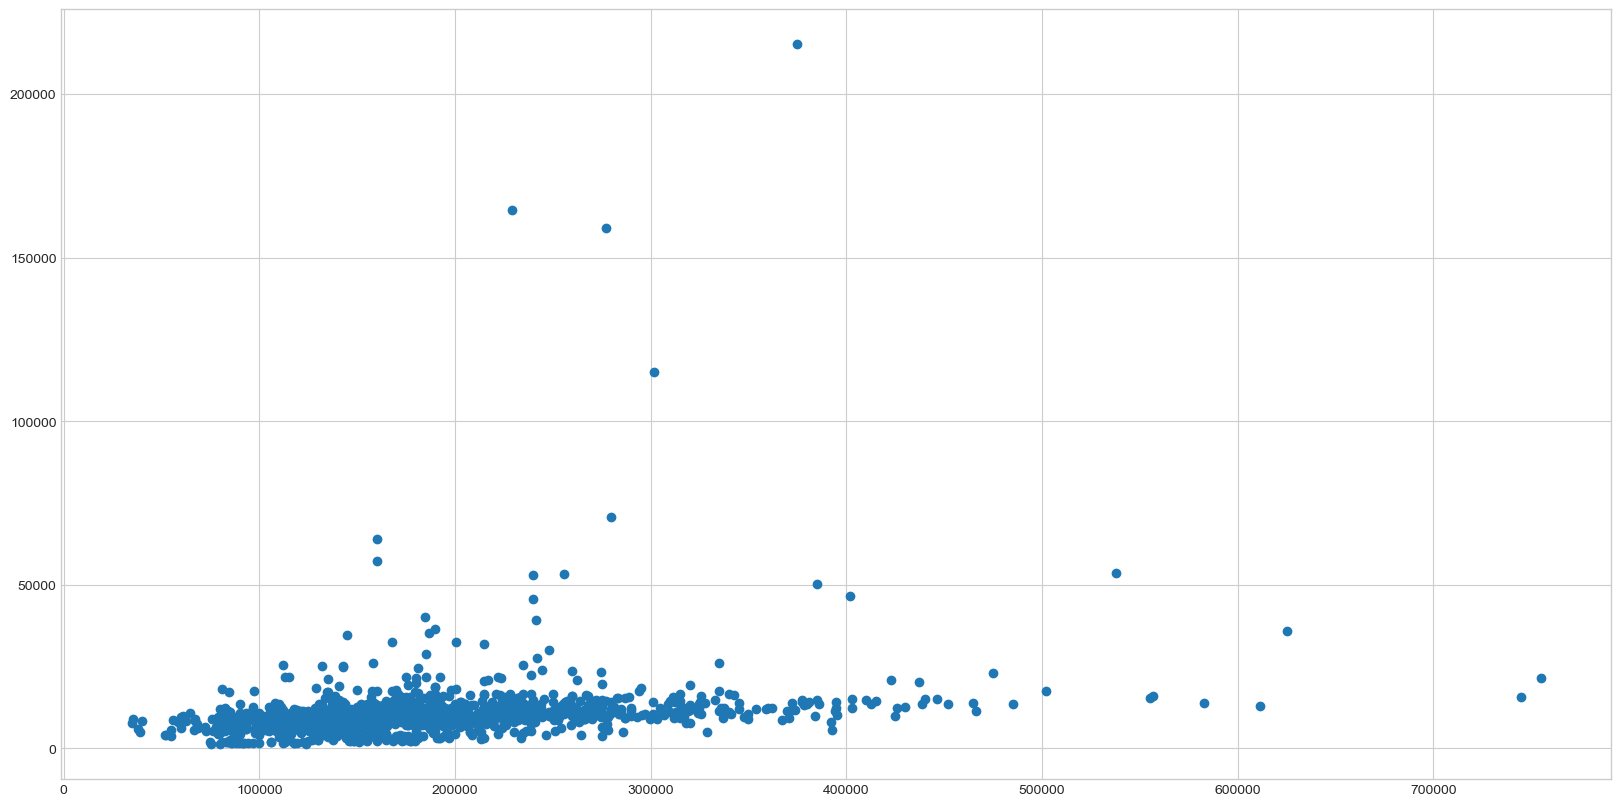

In [11]:
plt.figure(figsize = (20, 10))
plt.scatter(points[:, 0], points[:, 1])

In [16]:
# Perfom the actual clustering
hc = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage='ward')
y_hc= hc.fit_predict(points)

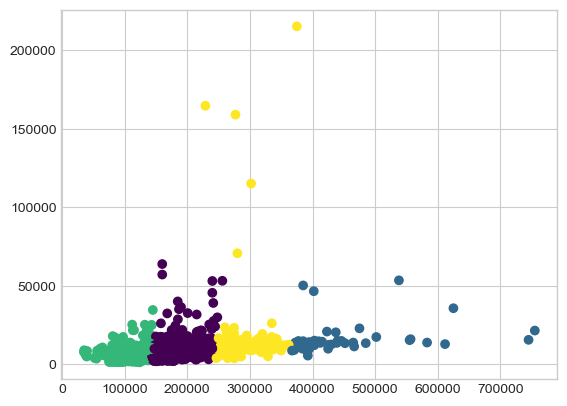

In [17]:
plt.scatter(points[:, 0], points[:, 1], c=y_hc, cmap='viridis')
plt.show()

# dendrograms with Scipy

In [18]:
X = df.values
y = df["SalePrice"].values

Z = linkage(X, 'ward')

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage


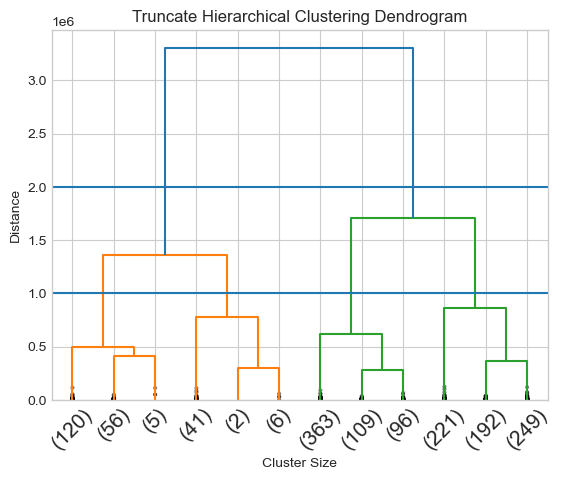

In [25]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title("Truncate Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=2000000)
plt.axhline(y=1000000)

plt.show()

# Generating hierarchical clusters

In [26]:
k = 2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.0

In [27]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.0

In [28]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)
sm.accuracy_score(y, Hclustering.labels_)

0.0